## 배운거
DNN

CNN
- Locally connected
- shared weight
- CNN models
    - Data augmentation
    - BN
- Transfer learning
    - Incremental Learning (catastropic forgetting)
    - Knowledge Distillation
        - Light Models
        
RNN

## RNN
https://colah.github.io/

In [1]:
import tensorflow as tf

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

- real RNN

![RNN](real_RNN.PNG)

- SimpleRNN : weight 생략

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(28,28))
])

In [12]:
model.summary() # 28*10 + 10*10 + 10

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 10)                390       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [13]:
temp = x_train[0][tf.newaxis]
model(temp)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.16540456, -0.07944115,  0.02441961,  0.199194  , -0.48233092,
         0.33761212,  0.05751814,  0.35455054, -0.07437587,  0.66081357]],
      dtype=float32)>

In [14]:
model(temp).shape

TensorShape([1, 10])

(26,28) -> 26번 차례 28개가 들어간다.(26번이 28개 들어온다)
    - I am groot(3단어) -> 25개 zero padding등 해야됨.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(28,28),return_sequences=True)
]) # return을 sequence로
model(temp).shape  

TensorShape([1, 28, 10])

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(28,28),return_sequences=False, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
]) # return을 sequence로
model.summary()

# 일차식이 들어온거라 Flatten 안해도 됨

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(28,28),return_sequences=True, activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
]) # return을 sequence로
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 28, 10)            390       
_________________________________________________________________
flatten_1 (Flatten)          (None, 280)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2810      
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________


#### return_sequences = False
- many to 1 

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5954 - acc: 0.4166
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1873 - acc: 0.5874
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0849 - acc: 0.6252
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0222 - acc: 0.6503
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9669 - acc: 0.6660
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9206 - acc: 0.6760
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8808 - acc: 0.6906
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8504 - acc: 0.7045
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8246 - acc: 0.7173
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8019 - acc: 0.7280


In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7647 - acc: 0.7375


[0.764683187007904, 0.737500011920929]

#### return_sequences = True
- 1 to many

In [13]:
model.fit(x_train,y_train,epochs=10)
model.evaluate(x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - acc: 0.8508
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2539 - acc: 0.9233
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2073 - acc: 0.9375
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1817 - acc: 0.9452
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1659 - acc: 0.9504
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1544 - acc: 0.9534
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1458 - acc: 0.9565
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1391 - acc: 0.9579
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1326 - acc: 0.9596
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.1230 - acc: 0.9628


[0.12299051880836487, 0.9628000259399414]

`tf.keras.layers.RNN`
- cell instance 한 개
    
return_state : 마지막 layer state 변환 여부

In [ ]:
model = tf.keras.models.Sequential([
#     tf.keras.layers.SimpleRNN(10, input_shape=(28,28),return_sequences=True, activation='tanh'),
    tf.keras.layers.RNN(10, input_shape=(28,28),return_sequences=True, 
                        ,return_state=True, activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [43]:
inp = tf.keras.Input((28,28))
rnn = tf.keras.layers.SimpleRNN(10, return_state=True)
model = tf.keras.models.Model(inputs=inp, outputs=rnn(inp))
model.summary()

# 2개의 output

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     [(None, 10), (None, 10)]  390       
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


many to many 문제 : **time distributed**
- 각각의 ,dense layer를 wrapper 방식으로 감싼다. 
- dense에 추가해서 넣어줌.
- input 최소 3차

In [24]:
layer1 = tf.keras.layers.SimpleRNN(10, return_sequences=True, input_shape=(28,28))
dense =  tf.keras.layers.Dense(10)
layer2 = tf.keras.layers.TimeDistributed(dense)
# layer를 넣어야 함 wrapper방식

In [25]:
model = tf.keras.models.Sequential([
    layer1,
    layer2
])
model.summary()

# TensorShape([1, 10])  -> TensorShape([1, 28, 10])


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 28, 10)            390       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 28, 10)            110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________


layer가 깊어지면 학습이 잘 되지 않는 문제(**gradient vanishing**)
    - relu
    - initialize


In [44]:
x  = tf.Variable(tf.range(-8.,8.,1))

In [45]:
with tf.GradientTape(persistent=True) as T:
    y = tf.nn.sigmoid(x)

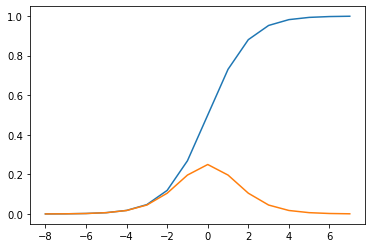

In [46]:
import matplotlib.pyplot as plt
plt.plot(x.numpy(),y.numpy())
plt.plot(x.numpy(),T.gradient(y,x).numpy() )

In [40]:
x = tf.random.normal((4,4))

In [41]:
# gradient 학습
# 파라미터가 계속 커짐 -> gradient exploding!
for i in range(100):
    x = tf.matmul(x, tf.random.normal((4,4)))
x

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[ 1.2963110e+26,  3.2306495e+26, -5.2384736e+25,  2.3815949e+26],
       [-2.9664627e+25, -7.3929773e+25,  1.1987656e+25, -5.4500094e+25],
       [-2.1909740e+25, -5.4603160e+25,  8.8538642e+24, -4.0252769e+25],
       [ 2.7151069e+25,  6.7665530e+25, -1.0971916e+25,  4.9882191e+25]],
      dtype=float32)>

gradient exploding! 문제
- 특정 값 이상일 경우 잘라버림 -> gradient cliping 

tf.keras.optimizers.Optimizer

RNN에서 long-term-dependency 문제 
- 가까운 것은 잘 기억 먼 것에 대한 것은 죽어버림
- 이것 때문에 거의 죽은 기술

## LSTM
- RNN의 문제 해결
- 구조 자체를 변경
- 변형 LSTM  -> GNU(자연어 처리), ConvLSTM2D(영상처리)

- cell state : 기억을 저장
- forget gate layer : 기억을 보존하는 값이 지나감
- input gate : 입력
- output gate : 출력

<br>

- gradient vanishing, cliping 등 문제 해결

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(10, input_shape=(28,28),return_sequences=True)
])